<a href="https://colab.research.google.com/github/Th30d0r00/SE1_Theodor_Penkert/blob/main/assignment_4_2023WS_30070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <h1> Scientific Programming in Python </h1>
    <h2> Assignment 4: The interaction between two atoms </h2>
    <h4> 2023WS_30070 <h4>
    <h3>
        Department of Computer Science, University of Applied Sciences Bonn-Rhein-Sieg, <br>
        Sankt Augustin, Germany
    </h3>
    <h4> November 13, 2023 </h4>
</center>

---



## Goal

The goal of this assigment is to learn about an alternative equation for modeling nonbounded interactions between atoms. Another new chapter will be the Pandas Library **[1]**, which is used for analyzing and manipulating data.

## Context

So far we have used the Lennard-Jones equation **[2]**, which has the following form:

$$ V_{LJ}(r)=4\varepsilon\left[\left(\dfrac{\sigma}{r}\right)^{12}-\left(\dfrac{\sigma}{r}\right)^{6}\right] $$

The variables in the Lennard-Jones Equation are:

- $V_{LJ}(r)$ is the potential energy of the interaction in $eV \text{(Electronvolt})$,
- $r$ the distance between the two interacting atoms in $Å \text{(Anström)}$,
- $\varepsilon$ the so called "dispertion energy" in $eV$ and
- $\sigma$ the "size of the particle" in $Å$.

An alternative equation for modeling nonbounded interactions was derived by Yang et al., which has the following form **[3]**:

$$ V_{Exp}(r)=\varepsilon\left[e^{\alpha\left(1-\dfrac{r}{\sigma}\right)}-\left(\left(\dfrac{r}{\sigma}\right)^{4}-2\left(\dfrac{r}{\sigma}\right)^{2}+3\right)e^{\left(\dfrac{\alpha}{2}\right)\left(1-\dfrac{r}{\sigma}\right)}\right] $$

$V_{LJ}(r)$, $r$, $\varepsilon$, $\sigma$ have the same meaning like in the Lennard-Jones Equation. In this equation, we also have the $\alpha$ parameter. $\alpha$ has no units and controls the influence of the exponential terms.

In our calcluations, we use the $Ar_{2}$ values for $\epsilon$, $\sigma$, and $\alpha$. These were also published by Yang et al.:

| Species           | $ϵ$ (kJ/mol)| $\sigma$ ($Å$)| $\alpha$ |
| :---------------- | :----------:| :-------------:| ---------:
| $Ar_{2}$          | 1.178       | 3.75           | 13.18


For benchmark target data, we use quantum mechanics (QM data) calculations from Cybulski and Toczylowksi. The calculaltions were determined (`in Hartree`) at different $r$ distances for different gas dimers **[4]**.



---



##Task 1

The first task is about the QM target data. For this task we need to import the `pandas libray`.

In [ ]:
import pandas as pd

Firstly we need to load the `QM Data` form the `csv file`:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/scipro/Assignment_4/CybulskiT1999_Ar2.csv",sep=';')
df

,R (Å),V(r) (Hartree)
0,3.000,0.003055
1,3.250,0.000518
2,3.500,-0.000279
3,3.500,-0.000279
4,3.600,NaN
5,3.750,-0.000441
6,3.775,-0.000442
7,3.800,-0.000441
8,3.850,-0.000436
9,3.950,NaN


Now we have to clean the input data, by removing `duplicated data` and `missing data`:

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(keep="first", inplace=True,ignore_index=True)
df

,R (Å),V(r) (Hartree)
0,3.000,0.003055
1,3.250,0.000518
2,3.500,-0.000279
3,3.750,-0.000441
4,3.775,-0.000442
5,3.800,-0.000441
6,3.850,-0.000436
7,4.000,-0.000400
8,4.250,-0.000313
9,4.500,-0.000232


Now we need to convert the potential energies from `Hartree` in `kJ/mol` (`1 Hartree is 2625.5 kJ/mol`) and include them into their `own dataframes`:

In [ ]:
ds_kJmol = df['V(r) (Hartree)'] * 2625.5
df = pd.concat([df,ds_kJmol.to_frame(name='V(r) (kJ/mol)')],axis=1)
df

,R (Å),V(r) (Hartree),V(r) (kJ/mol)
0,3.000,0.003055,8.020850
1,3.250,0.000518,1.360298
2,3.500,-0.000279,-0.732462
3,3.750,-0.000441,-1.157373
4,3.775,-0.000442,-1.160130
5,3.800,-0.000441,-1.158686
6,3.850,-0.000436,-1.145269
7,4.000,-0.000400,-1.049150
8,4.250,-0.000313,-0.822097
9,4.500,-0.000232,-0.609904


##Task2

In task 2, we need to compute the `Lennard-Jones potential energy` and the `exponential potential energy` by using the distances from the `QM data`.

In [ ]:
def lennardJonesFunction(epsilon: float, sigma: float, distance: float) -> float:
    """
    This function calculates the nonbound potential Energy, using the Lennard-Jones Equation

    Arguments:
        distance (float): The distance between the two atoms in Angström (Å)
        sigma (float): Size of the particle in Angström (Å)
        epsilon (float): Dispertion energy in electronvolt (eV)

    Return Value:
        (float): Potential energy in electonvolt (eV)
    """

    potential_energy = 4 * epsilon * ((sigma/distance)**12-(sigma/distance)**6)

    return potential_energy

We therefore loop through the distances and use every distance once in the Lennard-Jones equation. After that the list is converted to a dataframe and concatenated to our exiting dataframe:

In [ ]:
# Our values for Argon are:
epsilon = 1.178
sigma = 3.75
alpha = 13.18

In [ ]:
lennard_jones_series = []
for i,v in df['R (Å)'].items():
    lj_value = lennardJonesFunction(epsilon,sigma,v)
    lennard_jones_series.append(lj_value)

df_lennard_jones_series = pd.DataFrame(lennard_jones_series,columns=['LJ (eV)'])

df = pd.concat([df,df_lennard_jones_series],axis=1)
df

,R (Å),V(r) (Hartree),V(r) (kJ/mol),LJ (eV)
0,3.000,0.003055,8.020850,50.593771
1,3.250,0.000518,1.360298,15.121296
2,3.500,-0.000279,-0.732462,3.655327
3,3.750,-0.000441,-1.157373,0.000000
4,3.775,-0.000442,-1.160130,-0.176962
5,3.800,-0.000441,-1.158686,-0.332475
6,3.850,-0.000436,-1.145269,-0.587738
7,4.000,-0.000400,-1.049150,-1.027134
8,4.250,-0.000313,-0.822097,-1.174281
9,4.500,-0.000232,-0.609904,-1.049557


We use the following function for the expontential potential energy and do the same procedure:

In [ ]:
import math

def exponentialPotentialEnergy(epsilon: float, sigma: float, alpha: float, distance: float) -> float:
    """
    This function calculates the nonbound potential Energy, using the exponential Equation

    Arguments:
        distance (float): The distance between the two atoms in Angström (Å)
        sigma (float): Size of the particle in Angström (Å)
        epsilon (float): Dispertion energy in electronvolt (eV)
        alpha (float): controls the influence of the exponential terms


    Return Value:
        (float): Potential energy in electonvolt (eV)
    """

    potential_energy = epsilon * (math.exp(alpha*(1-(distance/sigma)))-(((distance/sigma)**4)-2*(distance/sigma)**2+3)*math.exp((alpha/2)*(1-(distance/sigma))))

    return potential_energy

In [ ]:
exponential_series = []
for i,v in df['R (Å)'].items():
    exp_value = exponentialPotentialEnergy(epsilon,sigma,alpha,v)
    exponential_series.append(exp_value)

df_exponential_series = pd.DataFrame(exponential_series,columns=['Exp (eV)'])

df = pd.concat([df,df_exponential_series],axis=1)
df


,R (Å),V(r) (Hartree),V(r) (kJ/mol),LJ (eV),Exp (eV)
0,3.000,0.003055,8.020850,50.593771,7.069414
1,3.250,0.000518,1.360298,15.121296,0.980612
2,3.500,-0.000279,-0.732462,3.655327,-0.849850
3,3.750,-0.000441,-1.157373,0.000000,-1.178000
4,3.775,-0.000442,-1.160130,-0.176962,-1.176025
5,3.800,-0.000441,-1.158686,-0.332475,-1.170442
6,3.850,-0.000436,-1.145269,-0.587738,-1.150291
7,4.000,-0.000400,-1.049150,-1.027134,-1.043507
8,4.250,-0.000313,-0.822097,-1.174281,-0.814908
9,4.500,-0.000232,-0.609904,-1.049557,-0.607275


##Task 3

In task 3, we need to `plot` the `QM target energies`, the `Lennard-Jones energies` and the `exponential energies`.

We use the built in plot function from pandas and get the following plots:

<Axes: xlabel='R (Å) (distance)', ylabel='V(r) (kJ/mol)'>

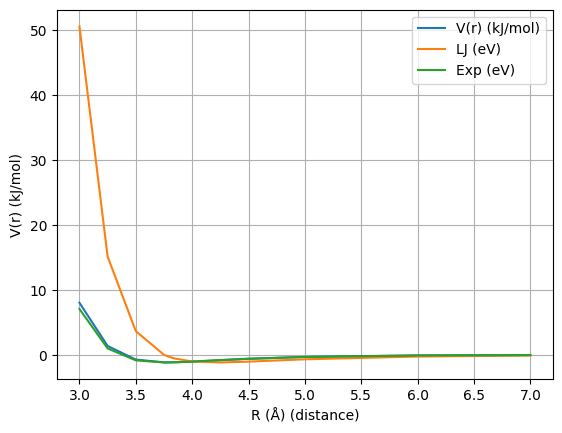

In [ ]:
df.plot(x='R (Å)', y=['V(r) (kJ/mol)','LJ (eV)','Exp (eV)'],kind='line',
        xlabel='R (Å) (distance)', ylabel='V(r) (kJ/mol)',grid=True)

##Task 4

We now need to save the `distances`, the `QM target energies (Hartree)`, the `QM target energies (kJ/mol)`, the `Lennard-Jones energies (kJ/mol)` and the `exponential energies (kJ/mol)` to a `CSV formatted file`.

The Lennard-Jones Energies and the expontential energies `are still in eV`. We  must convert them `into kJ/mol`, by mulitplying them with `1.602176565E-19` and `rename the column names`.



In [ ]:
df['LJ (eV)'] = df['LJ (eV)'] * 1.602176565E-19
df['Exp (eV)'] = df['Exp (eV)'] * 1.602176565E-19
df.rename(columns={"LJ (eV)": "LJ (kJ/mol)", "Exp (eV)": "Exp (kJ/mol)"},inplace=True)
df

,R (Å),V(r) (Hartree),V(r) (kJ/mol),LJ (kJ/mol),Exp (kJ/mol)
0,3.000,0.003055,8.020850,8.106015e-18,1.132645e-18
1,3.250,0.000518,1.360298,2.422699e-18,1.571113e-19
2,3.500,-0.000279,-0.732462,5.856479e-19,-1.361609e-19
3,3.750,-0.000441,-1.157373,0.000000e+00,-1.887364e-19
4,3.775,-0.000442,-1.160130,-2.835238e-20,-1.884200e-19
5,3.800,-0.000441,-1.158686,-5.326840e-20,-1.875255e-19
6,3.850,-0.000436,-1.145269,-9.416604e-20,-1.842970e-19
7,4.000,-0.000400,-1.049150,-1.645650e-19,-1.671882e-19
8,4.250,-0.000313,-0.822097,-1.881405e-19,-1.305627e-19
9,4.500,-0.000232,-0.609904,-1.681576e-19,-9.729623e-20


In [ ]:
df.to_csv('/content/drive/MyDrive/scipro/Assignment_4/Assignment_4_final',
          sep=',', float_format='%.1f',
          index=False, encoding='utf-8')

##References

**[1]** pandas.pydata.org, visited October 27.2023 https://pandas.pydata.org/

**[2]** LibreTexts Chemistry, visited October 02.2023 https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Intermolecular_Forces/Specific_Interactions/Lennard-Jones_Potential

**[3]** Yang, L; Sun, L. & Deng, W.-Q (2020) van der Waals Function for Molecular Mechanics.J.Phys.Chem.A, 124, 2102-2107

**[4]** Cybulski, S.M. & Toczylowski, R.R. (1999) Ground state potential energy curves for $HE_{2}$, $NE_{2}$, $Ar_{2}$, $HE-NE_{2}$, $He-A$, and $NE-Ar$: A Coupled-Cluster Study J.Chem.Phys., 111, 10520-10528